In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [80]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [81]:
dataset.drop(columns="User ID",inplace=True)
dataset.head(4)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0


### Categorical  data converted into binary using OneHotEncoder

In [82]:
ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded_array = ohe.fit_transform(dataset[["Gender"]])

In [83]:
n_data = pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out(), index=dataset.index)

In [84]:
dataset[n_data.columns] = n_data

In [85]:
dataset.drop(columns="Gender", inplace=True)
dataset.head(4)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0


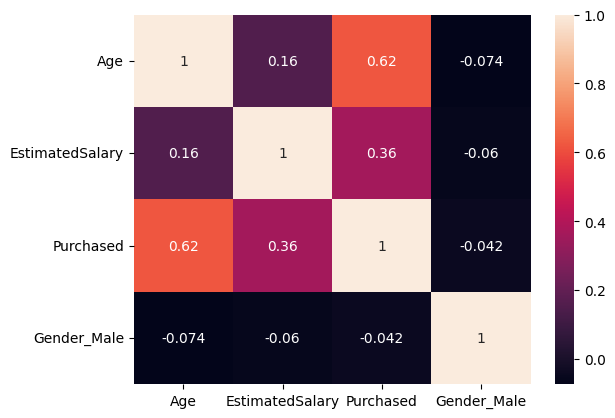

In [122]:

sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

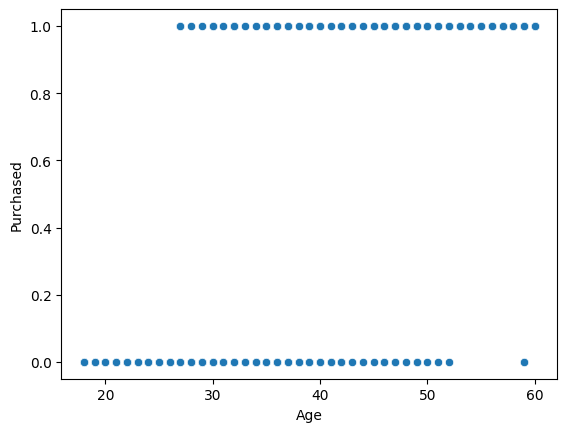

In [126]:
sns.scatterplot(x="Age", y="Purchased",data=dataset)
plt.show()

In [147]:
dataset.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased  Gender_Male
0     19            19000          0          1.0
1     35            20000          0          1.0
2     26            43000          0          0.0
3     27            57000          0          0.0
4     19            76000          0          1.0
..   ...              ...        ...          ...
395   46            41000          1          0.0
396   51            23000          1          1.0
397   50            20000          1          0.0
398   36            33000          0          1.0
399   49            36000          1          0.0

[400 rows x 4 columns]>

In [132]:
x = dataset[["Age", "Gender_Male"]]
y = dataset["Purchased"]

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Logistic Regression

In [134]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [135]:
lr.score(x_test, y_test)*100

91.25

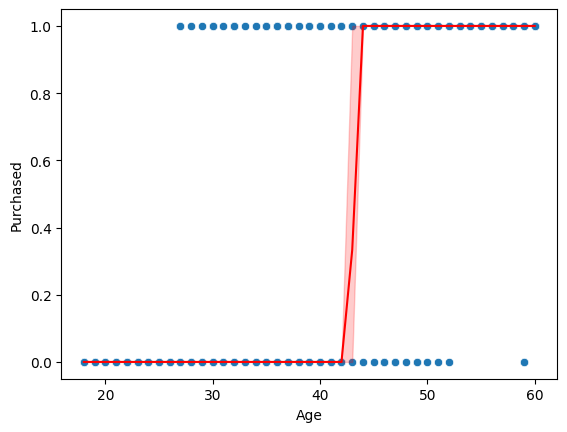

In [146]:
sns.scatterplot(x="Age", y="Purchased",data=dataset)
sns.lineplot(x="Age", y=lr.predict(x),data=dataset, c='red')
plt.show()